In [1]:
## Import required libraries
import numpy as np
import pandas as pd
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

pd.set_option('display.max_columns',25)

In [2]:
output_notebook()  ## Using this all calls to the function show() will be displayed inline in the notebook

Loading BokehJS ...

#### **``Loading CSV files of Total Population, CBR, DR, FR, IMR, LER, Rural & Urban Pop``**

#### **``1.Total Population Data``**

In [3]:
total_pop_df = pd.read_csv("Datasets/india-population-2020-06-22.csv",skiprows=15)
total_pop_df.head()

,date,Population,Annual % Change
0,1950-12-31,376325200,NaN
1,1951-12-31,382376948,1.61
2,1952-12-31,388799073,1.68
3,1953-12-31,395544369,1.73
4,1954-12-31,402578596,1.78


#### **``2. Crude Birth Rate Data``**

In [4]:
cbr_df = pd.read_csv("Datasets/india-population-cbr.csv")
cbr_df.head()

,date,Births per 1000 People,Annual % Change
0,31/12/1950,44.175,NaN
1,31/12/1951,43.970,-0.46
2,31/12/1952,43.764,-0.47
3,31/12/1953,43.558,-0.47
4,31/12/1954,43.352,-0.47


#### **``3. Death Rate Data``**

In [5]:
dr_df = pd.read_csv("Datasets/india-population-death_rate.csv",skiprows=15)
dr_df.head()

,date,Deaths per 1000 People,Annual % Change
0,1950-12-31,28.161,NaN
1,1951-12-31,27.584,-2.05
2,1952-12-31,27.008,-2.09
3,1953-12-31,26.432,-2.13
4,1954-12-31,25.856,-2.18


#### **``4. Fertility Rate Data``**

In [6]:
fert_df = pd.read_csv("Datasets/india-population-fertitltyrate.csv",skiprows=15)
fert_df.head()

,date,Births per Woman,Annual % Change
0,1950-12-31,5.907,NaN
1,1951-12-31,5.906,-0.02
2,1952-12-31,5.904,-0.03
3,1953-12-31,5.903,-0.02
4,1954-12-31,5.902,-0.02


#### **``5. Infant Mortality Rate Data``**

In [7]:
infant_mort_df = pd.read_csv("Datasets/india-population-infantmr.csv",skiprows=15)
infant_mort_df.head()

,date,Deaths per 1000 Live Births,Annual % Change
0,1950-12-31,189.629,NaN
1,1951-12-31,186.737,-1.53
2,1952-12-31,183.846,-1.55
3,1953-12-31,180.954,-1.57
4,1954-12-31,178.062,-1.60


#### **``6. Life Expectancy Rate Data``**

In [8]:
life_expect_df = pd.read_csv("Datasets/india-population-lifeexp.csv",skiprows=15)
life_expect_df.head()

,date,Life Expectancy from Birth (Years),Annual % Change
0,1950-12-31,35.21,NaN
1,1951-12-31,35.80,1.68
2,1952-12-31,36.39,1.65
3,1953-12-31,36.98,1.62
4,1954-12-31,37.57,1.60


#### **``7. Rural Population Data``**

In [9]:
rural_pop_df = pd.read_csv("Datasets/india-rural-population.csv",skiprows=16)
rural_pop_df.head()

,date,Rural Population,% of Total,Annual % Change
0,1960-12-31,369791513,82.076,1.8770
1,1961-12-31,376759490,81.968,1.8668
2,1962-12-31,383620708,81.782,1.8047
3,1963-12-31,390697755,81.595,1.8280
4,1964-12-31,397946824,81.405,1.8384


#### **``8. Urban Population Data``**

In [10]:
urban_pop_df = pd.read_csv("Datasets/india-urban-population.csv",skiprows=16)
urban_pop_df.head()

,date,Urban Population,% of Total,Annual % Change
0,1960-12-31,80756166,17.924,2.3467
1,1961-12-31,82882675,18.032,2.5992
2,1962-12-31,85456482,18.218,3.0581
3,1963-12-31,88127853,18.405,3.0781
4,1964-12-31,90901311,18.595,3.0986


#### **``9. Suicide Rate Data``**

In [11]:
suicide_rate_df = pd.read_csv("Datasets/india-suicide-rate.csv",skiprows=16)
suicide_rate_df

,date,Total,Male,Female
0,31/12/2000,17.40,18.6,16.0
1,31/12/2005,17.60,18.1,17.1
2,31/12/2010,16.50,17.7,15.2
3,31/12/2015,16.50,18.5,14.9
4,31/12/2016,16.30,18.0,14.7
5,31/12/2016,17.95,21.2,14.7
6,31/12/2019,21.10,25.8,16.4


In [12]:
suicide_rate_df.drop_duplicates(subset='date',keep='first',inplace=True)
suicide_rate_df

,date,Total,Male,Female
0,31/12/2000,17.4,18.6,16.0
1,31/12/2005,17.6,18.1,17.1
2,31/12/2010,16.5,17.7,15.2
3,31/12/2015,16.5,18.5,14.9
4,31/12/2016,16.3,18.0,14.7
6,31/12/2019,21.1,25.8,16.4


#### **``Initial Pre-processing of dataframes``**

In [13]:
total_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              151 non-null    object 
 1    Population       151 non-null    int64  
 2    Annual % Change  150 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


In [14]:
cbr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     151 non-null    object 
 1    Births per 1000 People  151 non-null    float64
 2    Annual % Change         150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [15]:
dr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     151 non-null    object 
 1    Deaths per 1000 People  151 non-null    float64
 2    Annual % Change         150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [16]:
fert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               151 non-null    object 
 1    Births per Woman  151 non-null    float64
 2    Annual % Change   150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [17]:
infant_mort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          151 non-null    object 
 1    Deaths per 1000 Live Births  151 non-null    float64
 2    Annual % Change              150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [18]:
life_expect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 151 non-null    object 
 1    Life Expectancy from Birth (Years)  151 non-null    float64
 2    Annual % Change                     150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [19]:
rural_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               59 non-null     object 
 1    Rural Population  59 non-null     int64  
 2    % of Total        59 non-null     float64
 3    Annual % Change   59 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [20]:
urban_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               59 non-null     object 
 1    Urban Population  59 non-null     int64  
 2    % of Total        59 non-null     float64
 3    Annual % Change   59 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [21]:
suicide_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 6
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     6 non-null      object 
 1    Total   6 non-null      float64
 2    Male    6 non-null      float64
 3    Female  6 non-null      float64
dtypes: float64(3), object(1)
memory usage: 240.0+ bytes


#### **``Few things to joot down here:``**
##### **1. In every dataframe 'date' column is of string datatype which needs to be converted to a datatime column.**
##### **2. The other two columns in every dataframe contains an unwanted space in their names which needs to be removed.**
##### **3. Capitalize the column names to provide the uniformity.**
##### **4. Rural and Urban Population dataframes are having less number of records as compare to others(investigate it later, these might not be having the post 2019 prediction records).**
##### **5. For Suicide Rate only 6 years data is available and for 2016 there are multiple records which will be investigated later.**  

In [22]:
total_pop_df.head()

,date,Population,Annual % Change
0,1950-12-31,376325200,NaN
1,1951-12-31,382376948,1.61
2,1952-12-31,388799073,1.68
3,1953-12-31,395544369,1.73
4,1954-12-31,402578596,1.78


In [23]:
def data_cleaning(d_frame):
    """
    Description: This function is performing below operations:
            1. Columns uniformity 
            2. Filtering the records where year > 2019
            3. Assigning the Date column of every dataframe as Index
    
    Input Parameters: It accepts:
            1. d_frame: DataFrame object 
    """
    d_frame.iloc[:,0] = pd.to_datetime(d_frame.iloc[:,0])
    d_frame.columns = ([str.capitalize(str.strip(col)) for col in d_frame.columns])
    d_frame.where(d_frame.iloc[:,0].dt.year <= 2019,inplace=True)
    d_frame.drop_duplicates(keep=False,inplace=True)
    d_frame.index = d_frame[d_frame.columns[0]]
    d_frame.drop([d_frame.columns[0]],axis=1,inplace=True)

In [24]:
all_data_frames = [total_pop_df,cbr_df,dr_df,fert_df,infant_mort_df,life_expect_df,rural_pop_df,urban_pop_df,suicide_rate_df]
for df in all_data_frames:
    data_cleaning(d_frame=df)

##### **``Now, let's analyse every dataframe one at a time...``**

In [25]:
for df in all_data_frames:
    name =[x for x in globals() if globals()[x] is df][0]
    print('DataFrame :: ',name,'\n')
    df.info()
    print('Starting Date:',df.index.min())
    print('Latest Date:',df.index.max())
    print('\n')

DataFrame ::  total_pop_df 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 1950-12-31 to 2019-12-31
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Population       70 non-null     float64
 1   Annual % change  69 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
Starting Date: 1950-12-31 00:00:00
Latest Date: 2019-12-31 00:00:00


DataFrame ::  cbr_df 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 1950-12-31 to 2019-12-31
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Births per 1000 people  70 non-null     float64
 1   Annual % change         69 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
Starting Date: 1950-12-31 00:00:00
Latest Date: 2019-12-31 00:00:00


DataFrame ::  dr_df 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 1

##### **Here, we found out that in Rural and Urban Population datasets records are not available for years 1951 to 1959 and 2019. And, Suicide Rate dataset has very records.**
##### **Now, lets merge all the dataframes**

In [26]:
ind_pop_df = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],how='outer'), all_data_frames)

In [27]:
ind_pop_df.shape

(70, 21)

In [28]:
ind_pop_df.head()

,Population,Annual % change_x,Births per 1000 people,Annual % change_y,Deaths per 1000 people,Annual % change_x,Births per woman,Annual % change_y,Deaths per 1000 live births,Annual % change_x,Life expectancy from birth (years),Annual % change_y,Rural population,% of total_x,Annual % change_x,Urban population,% of total_y,Annual % change_y,Total,Male,Female
Date,,,,,,,,,,,,,,,,,,,,,
1950-12-31,376325200.0,NaN,44.175,NaN,28.161,NaN,5.907,NaN,189.629,NaN,35.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-12-31,382376948.0,1.61,43.970,-0.46,27.584,-2.05,5.906,-0.02,186.737,-1.53,35.80,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952-12-31,388799073.0,1.68,43.764,-0.47,27.008,-2.09,5.904,-0.03,183.846,-1.55,36.39,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953-12-31,395544369.0,1.73,43.558,-0.47,26.432,-2.13,5.903,-0.02,180.954,-1.57,36.98,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-12-31,402578596.0,1.78,43.352,-0.47,25.856,-2.18,5.902,-0.02,178.062,-1.60,37.57,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ind_pop_df['Population'] = ind_pop_df['Population'].apply(lambda val: np.divide(val,10000000,dtype=np.float))

In [29]:
ind_pop_df.columns = ['Population','Pop_annual_change','Birth_Rate','BR_annual_change','Death_Rate','DR_annual_change','Fert_Rate','FR_annual_change',
                     'Inf_Mort_Rate','Inf_Mort_annual_change','Life_Exp_Rate','Life_Exp_annual_change',
                      'Rural_Pop','Rural_Percent_of_Total_Pop','Rural_Pop_change','Urban_Pop','Urban_Percent_of_Total_Pop','Urban_Pop_change',
                      'SR_Total','SR_Male','SR_Female']

ind_pop_df.reset_index(inplace=True)
ind_pop_df['Year'] = ind_pop_df['Date'].dt.year

In [76]:
ind_pop_df.head(10)

,Date,Population,Pop_annual_change,Birth_Rate,BR_annual_change,Death_Rate,DR_annual_change,Fert_Rate,FR_annual_change,Inf_Mort_Rate,Inf_Mort_annual_change,Life_Exp_Rate,Life_Exp_annual_change,Rural_Pop,Rural_Percent_of_Total_Pop,Rural_Pop_change,Urban_Pop,Urban_Percent_of_Total_Pop,Urban_Pop_change,SR_Total,SR_Male,SR_Female,Year
0,1950-12-31,37.632520,NaN,44.175,NaN,28.161,NaN,5.907,NaN,189.629,NaN,35.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950
1,1951-12-31,38.237695,1.61,43.970,-0.46,27.584,-2.05,5.906,-0.02,186.737,-1.53,35.800,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951
2,1952-12-31,38.879907,1.68,43.764,-0.47,27.008,-2.09,5.904,-0.03,183.846,-1.55,36.390,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952
3,1953-12-31,39.554437,1.73,43.558,-0.47,26.432,-2.13,5.903,-0.02,180.954,-1.57,36.980,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953
4,1954-12-31,40.257860,1.78,43.352,-0.47,25.856,-2.18,5.902,-0.02,178.062,-1.60,37.570,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954
5,1955-12-31,40.988059,1.81,43.146,-0.48,25.280,-2.23,5.900,-0.03,175.171,-1.62,38.160,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955
6,1956-12-31,41.744281,1.84,42.941,-0.48,24.703,-2.28,5.899,-0.02,172.279,-1.65,38.750,1.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956
7,1957-12-31,42.527070,1.88,42.735,-0.48,24.127,-2.33,5.897,-0.03,169.388,-1.68,39.340,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
8,1958-12-31,43.338098,1.91,42.529,-0.48,23.551,-2.39,5.896,-0.02,166.496,-1.71,39.930,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958
9,1959-12-31,44.179858,1.94,42.298,-0.54,23.016,-2.27,5.895,-0.02,164.119,-1.43,40.532,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959


## ***``Exploratory Data Analysis``***

In [48]:
def graph_customization(label_x, label_y, grph_title, x_ticks_rot=0, ticks_size=11, y_ticks_rot=10, x_ticks=False, x_ticks_labels=False, y_ticks=False, y_ticks_labels=False):
    """
    Description: This function is created for customizing the labels, title and axis ticks.
    
    Input Parameters: It accepts below input parameters:
            1. label_x : X-axis label
            2. label_y : Y-axis label
            3. grph_title : Title of the graph
            4. x_ticks_rot : X-ticks rotation value; by default = 0 
            5. ticks_size : X-axis and Y-axis ticks size; by default = 11 
            6. y_ticks_rot : Y-axis ticks rotation; by default = 10 
            7. x_ticks : Locations of X-axis ticks; by default = False
            8. x_ticks_labels : Labels of the X-axis ticks; by default = False
            9. y_ticks : Locations of Y-axis ticks; by default = False
            10. y_ticks_labels : Labels of the Y-axis ticks; by default = False
    
    Returns : None
    """
    label_font_style = {'size':18,'family':'calibri','color':'coral','style':'italic'}
    title_font_style = {'size':20,'family':'calibri','color':'blue','style':'italic'}
    
    plt.xlabel(label_x,fontdict=label_font_style)
    plt.ylabel(label_y,fontdict=label_font_style)
    plt.title(grph_title,fontdict=title_font_style)
    
    if x_ticks != False:
        plt.xticks(ticks=x_ticks, labels= x_tick_labels, rotation=x_ticks_rot, size=ticks_size, style='oblique')
    else:
        plt.xticks(rotation=x_ticks_rot,size=ticks_size,style='oblique')
    
    if y_ticks != False:
        plt.yticks(ticks=y_ticks, labels= y_tick_labels, rotation=y_ticks_rot, size=ticks_size, style='oblique')
    else:
        plt.yticks(rotation=y_ticks_rot,size=ticks_size,style='oblique')

### **``Plot-1``**
#### **``Let's try to visualize the trend in population growth. Is it very steap in any decade between 1950 to 2019?``**

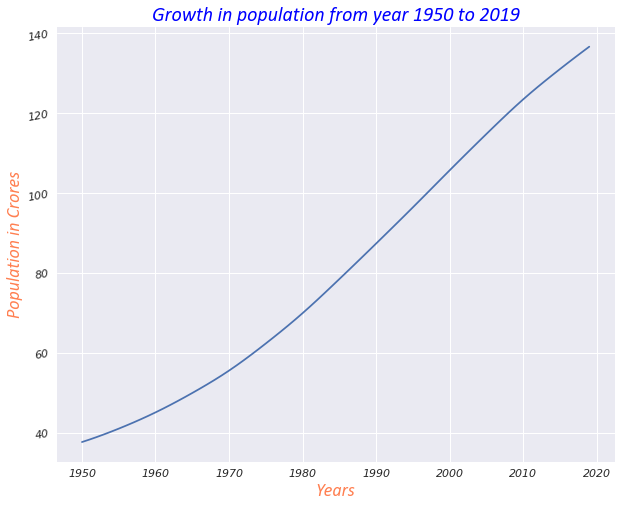

In [75]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    sns.lineplot(x='Year',y='Population',data=ind_pop_df,palette=sns.color_palette('PuBu',2))
    graph_customization('Years','Population in Crores','Growth in population from year 1950 to 2019')

##### **So, it is quite evident that India's population has followed the gradual increase trend from 1950 to 2019.**

### **``Plot-2``**
#### **``Let's see whether Annual Population Change(%) will show us any different trend in population growth.``**

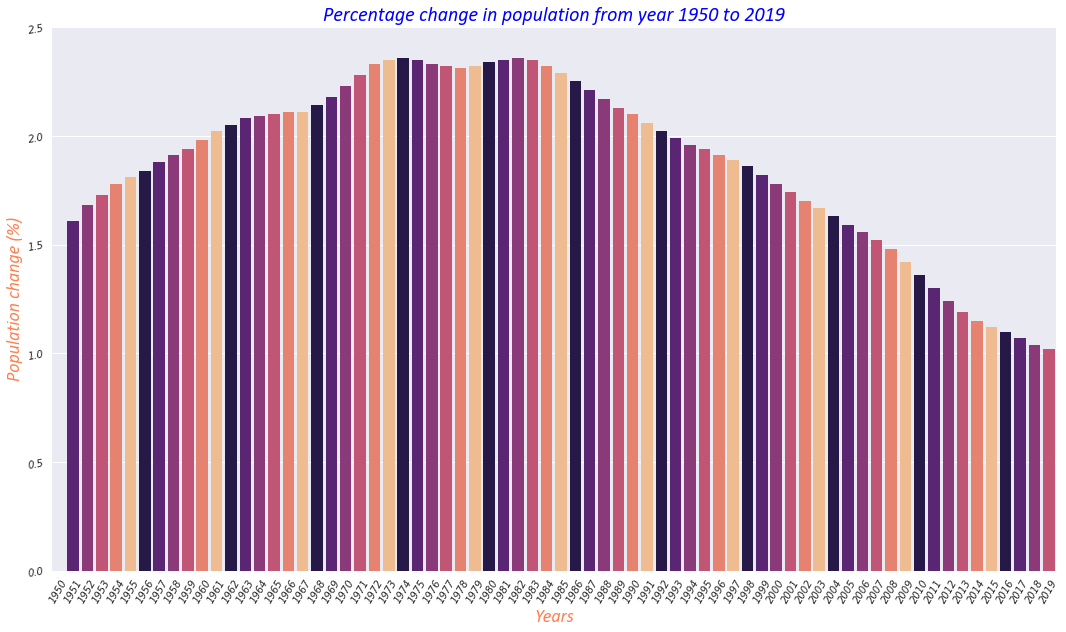

In [79]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.barplot(x='Year',y='Pop_annual_change',data=ind_pop_df,palette=sns.color_palette('magma'))
    graph_customization('Years','Population change (%)','Percentage change in population from year 1950 to 2019',ticks_size=10,x_ticks_rot=60)
    plt.ylim(bottom=0, top=2.5)

##### **So, here things are not very straight forward till year 1967 the increase was gradual, however, between 1968 to 1985 there are few ups & down. And, the annual pop change reached its highest value twice.**

### **``Plot-3``**
#### **``Let's see the trend of Annual Population Change(%) in every decade.``**

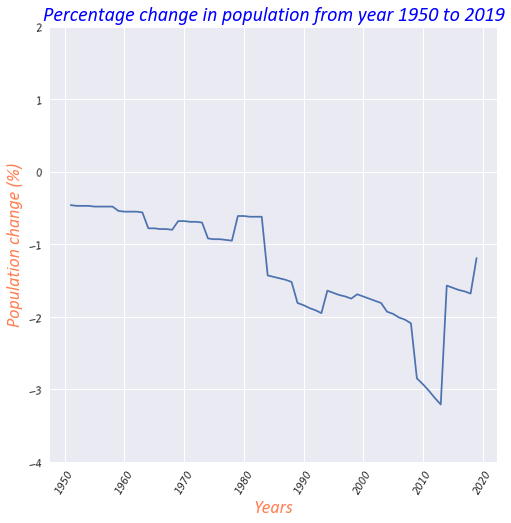

In [105]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,8))
    sns.lineplot(x='Year',y='BR_annual_change',data=ind_pop_df,palette=sns.color_palette('twilight'))
    graph_customization('Years','Population change (%)','Percentage change in population from year 1950 to 2019',ticks_size=10,x_ticks_rot=60)
    plt.ylim(bottom=-4,top=2)

In [100]:
ind_pop_df.tail()

,Date,Population,Pop_annual_change,Birth_Rate,BR_annual_change,Death_Rate,DR_annual_change,Fert_Rate,FR_annual_change,Inf_Mort_Rate,Inf_Mort_annual_change,Life_Exp_Rate,Life_Exp_annual_change,Rural_Pop,Rural_Percent_of_Total_Pop,Rural_Pop_change,Urban_Pop,Urban_Percent_of_Total_Pop,Urban_Pop_change,SR_Total,SR_Male,SR_Female,Year
65,2015-12-31,131.015240,1.12,18.944,-1.60,7.253,-0.07,2.334,-1.31,36.249,-3.76,68.37,0.44,880723750.0,67.223,0.5337,429428653.0,32.777,2.3229,16.5,18.5,14.9,2015
66,2016-12-31,132.451725,1.10,18.636,-1.63,7.247,-0.08,2.302,-1.37,34.833,-3.91,68.67,0.44,885010817.0,66.818,0.4856,439498772.0,33.182,2.3179,16.3,18.0,14.7,2016
67,2017-12-31,133.867679,1.07,18.328,-1.65,7.242,-0.07,2.271,-1.35,33.416,-4.07,68.97,0.44,888869466.0,66.400,0.4351,449789369.0,33.600,2.3144,NaN,NaN,NaN,2017
68,2018-12-31,135.264228,1.04,18.020,-1.68,7.237,-0.07,2.240,-1.37,32.000,-4.24,69.27,0.43,892321651.0,65.970,0.3876,460295677.0,34.030,2.3090,NaN,NaN,NaN,2018
69,2019-12-31,136.641775,1.02,17.806,-1.19,7.273,0.50,2.220,-0.89,30.924,-3.36,69.50,0.33,NaN,NaN,NaN,NaN,NaN,NaN,21.1,25.8,16.4,2019


#### Above is the final dataframe
    - Find the hidden patterns (Via visualization)
    - ANOVA Statistical Test??

In [34]:
p = figure(plot_width=400, plot_height=400,x_axis_label='x',y_axis_label='y')

p.square(cbr_data['Births per 1000 People'],cbr_data['Annual % Change'],size=15,line_color='black',fill_alpha=0.5,fill_color='orange')

show(p)

NameError: name 'cbr_data' is not defined